**Assingment week 5:  Document Classification**

Team:

Khyati Kaik

Laura Puebla

**About this excercise:**

It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  UCI Machine Learning Repository: Spambase Data Set [UCI Machine Learning Repository: Spambase Data Set](http://archive.ics.uci.edu/dataset/94/spambase)

Importing libraries

In [2]:
import nltk
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",\
         "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",\
         "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",\
         "word_freq_people", "word_freq_report", "word_freq_addresses", \
         "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", \
         "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", \
         "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george",\
         "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", \
         "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", \
         "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm",\
         "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original",\
         "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table",\
         "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", \
         "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", \
         "capital_run_length_longest", "capital_run_length_total", "spam"]


spam_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", \
                        names = names)

spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Variable types
print(spam_data.dtypes)

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [5]:
# Count spam and non-spam
count_spam = len(spam_data[spam_data.spam==1])
count_nonspam = len(spam_data[spam_data.spam==0])



In [6]:
#Printing count Spam and Non-Spam
print ("Spam: %d" %count_spam)
print ("Non-spam: %d" %count_nonspam)

Spam: 1813
Non-spam: 2788


In [7]:
# Split into test, train, validate
percTrain = 0.7
percVal = 0.15
percTest = 0.15
N = len(spam_data)
trainNum = int(percTrain * N)
valNum = int(percVal * N)
testNum = N - trainNum - valNum

In [8]:
# Check targets
print ("Training target: %d" %trainNum)
print ("Validation target: %d" %valNum)
print ("Testing target: %d" %testNum)
print ("Total: %d" %(trainNum + valNum + testNum))

Training target: 3220
Validation target: 690
Testing target: 691
Total: 4601


In [9]:
# Split it up
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
trainSet, testSet = train_test_split(spam_data, test_size=testNum, random_state=8)
trainSet, valSet = train_test_split(trainSet, test_size=valNum, random_state=88)

In [10]:
# Check lengths
print ("Training set: %d" %len(trainSet))
print ("Validation set: %d" %len(valSet))
print ("Testing set: %d" %len(testSet))
print ("Total: %d" %(len(trainSet) + len(valSet) + len(testSet)))

Training set: 3220
Validation set: 690
Testing set: 691
Total: 4601


In [22]:
##
testSetVars = testSet.drop('spam', axis=1)

In [23]:
##
testSetClass = testSet['spam']

In [26]:
##
trainSetVars = trainSet.drop('spam', axis=1)

In [29]:
##
trainSetClass = trainSet['spam']

In [11]:
# Random forest - train
from sklearn import ensemble


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the RandomForestClassifier
rf = ensemble.RandomForestClassifier(criterion="entropy", random_state=88)
rf_fit = rf.fit(trainSetVars, trainSetClass)

# Predict on the training set
rf_train = rf_fit.predict(trainSetVars)

# Calculate and print the classification report
print("Classification Report (Training Set):")
print(classification_report(trainSetClass, rf_train))

# Calculate and print the confusion matrix
print("Confusion Matrix (Training Set):")
print(confusion_matrix(trainSetClass, rf_train))

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00      1262

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220

Confusion Matrix (Training Set):
[[1957    1]
 [   1 1261]]


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
rf_test = rf_fit.predict(testSetVars)

# Calculate and print the classification report
print("Classification Report (Test Set):")
print(classification_report(testSetClass, rf_test))

# Calculate and print the confusion matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(testSetClass, rf_test))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       412
           1       0.96      0.92      0.94       279

    accuracy                           0.96       691
   macro avg       0.96      0.95      0.95       691
weighted avg       0.96      0.96      0.95       691

Confusion Matrix (Test Set):
[[402  10]
 [ 21 258]]


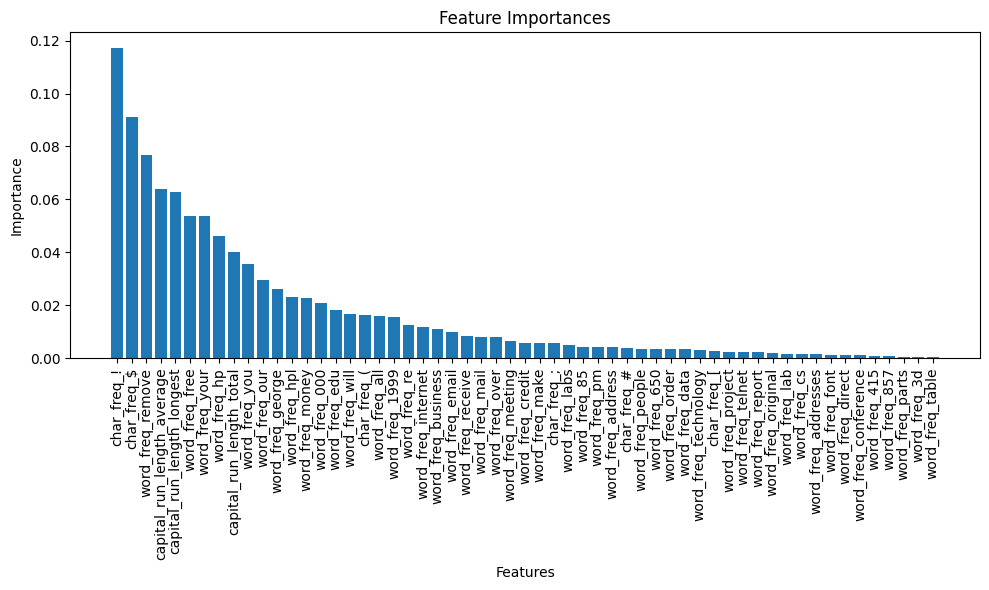

In [37]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_fit.feature_importances_

# Get the corresponding feature names
feature_names = testSetVars.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Conclusion:

Training Set:

The model achieved a perfect accuracy of 1.00, indicating that it accurately classified all instances in the training set.
Both classes (0 and 1) have precision, recall, and F1-scores of 1.00, indicating perfect performance in predicting both classes.
The confusion matrix shows only one misclassification, with one instance falsely predicted as class 1.


Test Set:

The model achieved a high accuracy of 0.96, indicating a strong performance in classifying the instances in the test set.
For class 0, the precision, recall, and F1-score are 0.95, 0.98, and 0.96, respectively. This indicates that the model has a high ability to correctly classify instances of class 0, with a good balance between precision and recall.
For class 1, the precision, recall, and F1-score are 0.96, 0.92, and 0.94, respectively. This indicates that the model also performs well in correctly classifying instances of class 1, although with a slightly lower recall compared to class 0.
The confusion matrix shows that there are some misclassifications, with 10 instances of class 0 falsely predicted as class 1 and 21 instances of class 1 falsely predicted as class 0.


In summary, the model demonstrates excellent performance on the training set, achieving perfect accuracy and precise predictions for both classes. On the test set, the model maintains a high accuracy and exhibits a good balance between precision and recall for both classes, although there are some misclassifications. Overall, the model shows strong potential for classifying spam and non-spam emails, but there is still room for improvement, especially in reducing the number of false predictions on the test set.